In [13]:
import numpy as np 
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score 
import matplotlib.pyplot as plt


diabetes = load_diabetes(as_frame = True)
print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [17]:
df = diabetes.frame
print(df.head())
print(diabetes.DESCR)

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progres

In [18]:
y_diabetes = df['target']

X_diabetes = df.drop("target",axis=1)

X_train , X_test  , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(16512, 8) (4128, 8) (16512,) (4128,)


In [20]:
lr_model = LinearRegression()

lr_model.fit(X_train , y_train)

for feature , coeff in zip(X_train.columns , lr_model.coef_) :
    print(f"{feature} : {coeff:.4f}")

MedInc : 0.4487
HouseAge : 0.0097
AveRooms : -0.1233
AveBedrms : 0.7831
Population : -0.0000
AveOccup : -0.0035
Latitude : -0.4198
Longitude : -0.4337


In [22]:
y_pred = lr_model.predict(X_test)

print(y_test.head())

print("_________________________________________________")

print(y_pred[:5])

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
Name: MedHouseVal, dtype: float64
_________________________________________________
[0.71912284 1.76401657 2.70965883 2.83892593 2.60465725]


In [23]:
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)


print("MSE :",mse)
print("RMSE :",rmse)
print("R-squared : ",r2)


print("\n--- Interpretation ---")
print(f"On average, our model's predictions for disease progression are off by roughly {rmse:.2f}.")
print(f"The R-squared value of {r2:.4f} means that approximately {r2*100:.2f}% of the variance in disease progression can be explained by our model's features.")

MSE : 0.555891598695244
RMSE : 0.7455813830127761
R-squared :  0.5757877060324511

--- Interpretation ---
On average, our model's predictions for disease progression are off by roughly 0.75.
The R-squared value of 0.5758 means that approximately 57.58% of the variance in disease progression can be explained by our model's features.


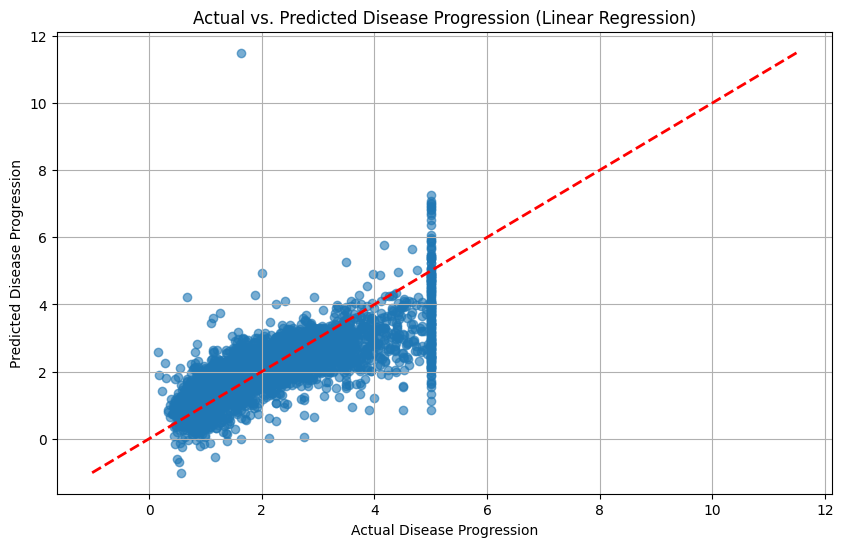

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.6)

min_val = min(y_test.min() , y_pred.min())
max_val = max(y_test.max() , y_pred.max())

plt.plot([min_val , max_val],[min_val , max_val],"r--",lw=2)
plt.xlabel("Actual Disease Progression")
plt.ylabel("Predicted Disease Progression")
plt.title("Actual vs. Predicted Disease Progression (Linear Regression)")
plt.grid(True)
plt.show()

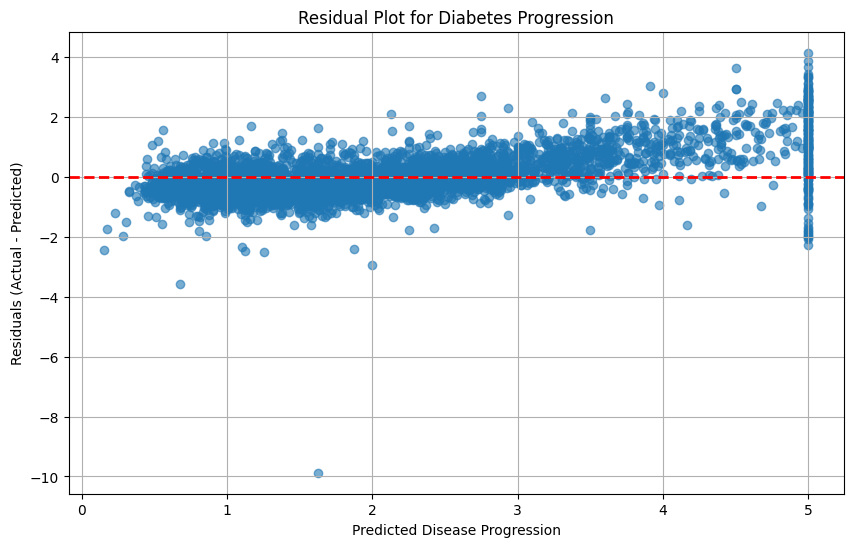

In [26]:
residual_plot = y_test - y_pred 
plt.figure(figsize=(10,6))
plt.scatter(y_test,residual_plot,alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2) # Horizontal line at y=0
plt.xlabel("Predicted Disease Progression")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot for Diabetes Progression")
plt.grid(True)
plt.show()